In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scipy.signal import savgol_filter

In [2]:
import scienceplots

In [3]:
plt.style.use(['science',"ieee"])  #In this command ieee has higher priority than science if available
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['text.usetex'] = False

In [4]:
import h5py
from os import listdir
from os.path import isfile, join

def get_results(model, exp_folder):
    
    
    onlyfiles = [f for f in listdir(f"./results/{model}/{exp_folder}") \
                 if isfile(join(f"./results/{model}/{exp_folder}", f))]
    glob_acc_lst = []
    train_loss_lst = []
    test_acc_lst = []
    test_loss_lst = []
    for file in onlyfiles:
        f = h5py.File(f'./results/{model}/{exp_folder}/{file}', 'r')
        print(file)
        glob_acc_lst.append(f['rs_glob_acc'][:])
        train_loss_lst.append(f['rs_train_loss'][:])
        test_loss_lst.append(f['rs_test_loss'][:])
        test_acc_lst.append(f['rs_test_acc'][:])
        f.close()
    return glob_acc_lst, train_loss_lst, test_acc_lst, test_loss_lst



In [5]:
def get_mu_std(lst):
    mu = np.array(lst).mean(axis=0)
    std = np.array(lst).std(axis=0)
    return mu, std

## MLP-MNIST

In [6]:
MLP_MNIST_Sophia = get_results('mlp', 'mnist-sophia')
MLP_MNIST_DONE = get_results('mlp', 'mnist-done')
MLP_MNIST_FedAvg = get_results('mlp', 'mnist-fedavg')

mlp_mnist_sophia_loss = MLP_MNIST_Sophia[-1]
mlp_mnist_sophia_acc = MLP_MNIST_Sophia[-2]

mlp_mnist_done_loss = MLP_MNIST_DONE[-1]
mlp_mnist_done_acc = MLP_MNIST_DONE[-2]

mlp_mnist_fedavg_loss = MLP_MNIST_FedAvg[-1]
mlp_mnist_fedavg_acc = MLP_MNIST_FedAvg[-2]

Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_0.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_4.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_2.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_3.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_1.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_2.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_0.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_1.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_4.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_3.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_4(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_2(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_1(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_0(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_3(1).h5


In [7]:
# mu/std for losses
mlp_mnist_sophia_loss_mu, mlp_mnist_sophia_loss_std = get_mu_std(mlp_mnist_sophia_loss)
mlp_mnist_done_loss_mu, mlp_mnist_done_loss_std = get_mu_std(mlp_mnist_done_loss)
mlp_mnist_fedavg_loss_mu, mlp_mnist_fedavg_loss_std = get_mu_std(mlp_mnist_fedavg_loss)

# mu/std for acc
mlp_mnist_sophia_acc_mu, mlp_mnist_sophia_acc_std = get_mu_std(mlp_mnist_sophia_acc)
mlp_mnist_done_acc_mu, mlp_mnist_done_acc_std = get_mu_std(mlp_mnist_done_acc)
mlp_mnist_fedavg_acc_mu, mlp_mnist_fedavg_acc_std = get_mu_std(mlp_mnist_fedavg_acc)



In [8]:
# extend mlp_mnist_fedavg_acc_mu to be 1000 elements not 100
# every elment is repeated 10 times

mlp_mnist_fedavg_acc_mu_ext, mlp_mnist_sophia_acc_mu_ext, mlp_mnist_done_acc_mu_ext = [], [], []
for i in range(100):
    for j in range(10):
        mlp_mnist_fedavg_acc_mu_ext.append(mlp_mnist_fedavg_acc_mu[i])
        mlp_mnist_sophia_acc_mu_ext.append(mlp_mnist_sophia_acc_mu[i])

In [9]:
for i in range(100):
    for j in range(80):
        mlp_mnist_done_acc_mu_ext.append(mlp_mnist_done_acc_mu[i])

### Total iters

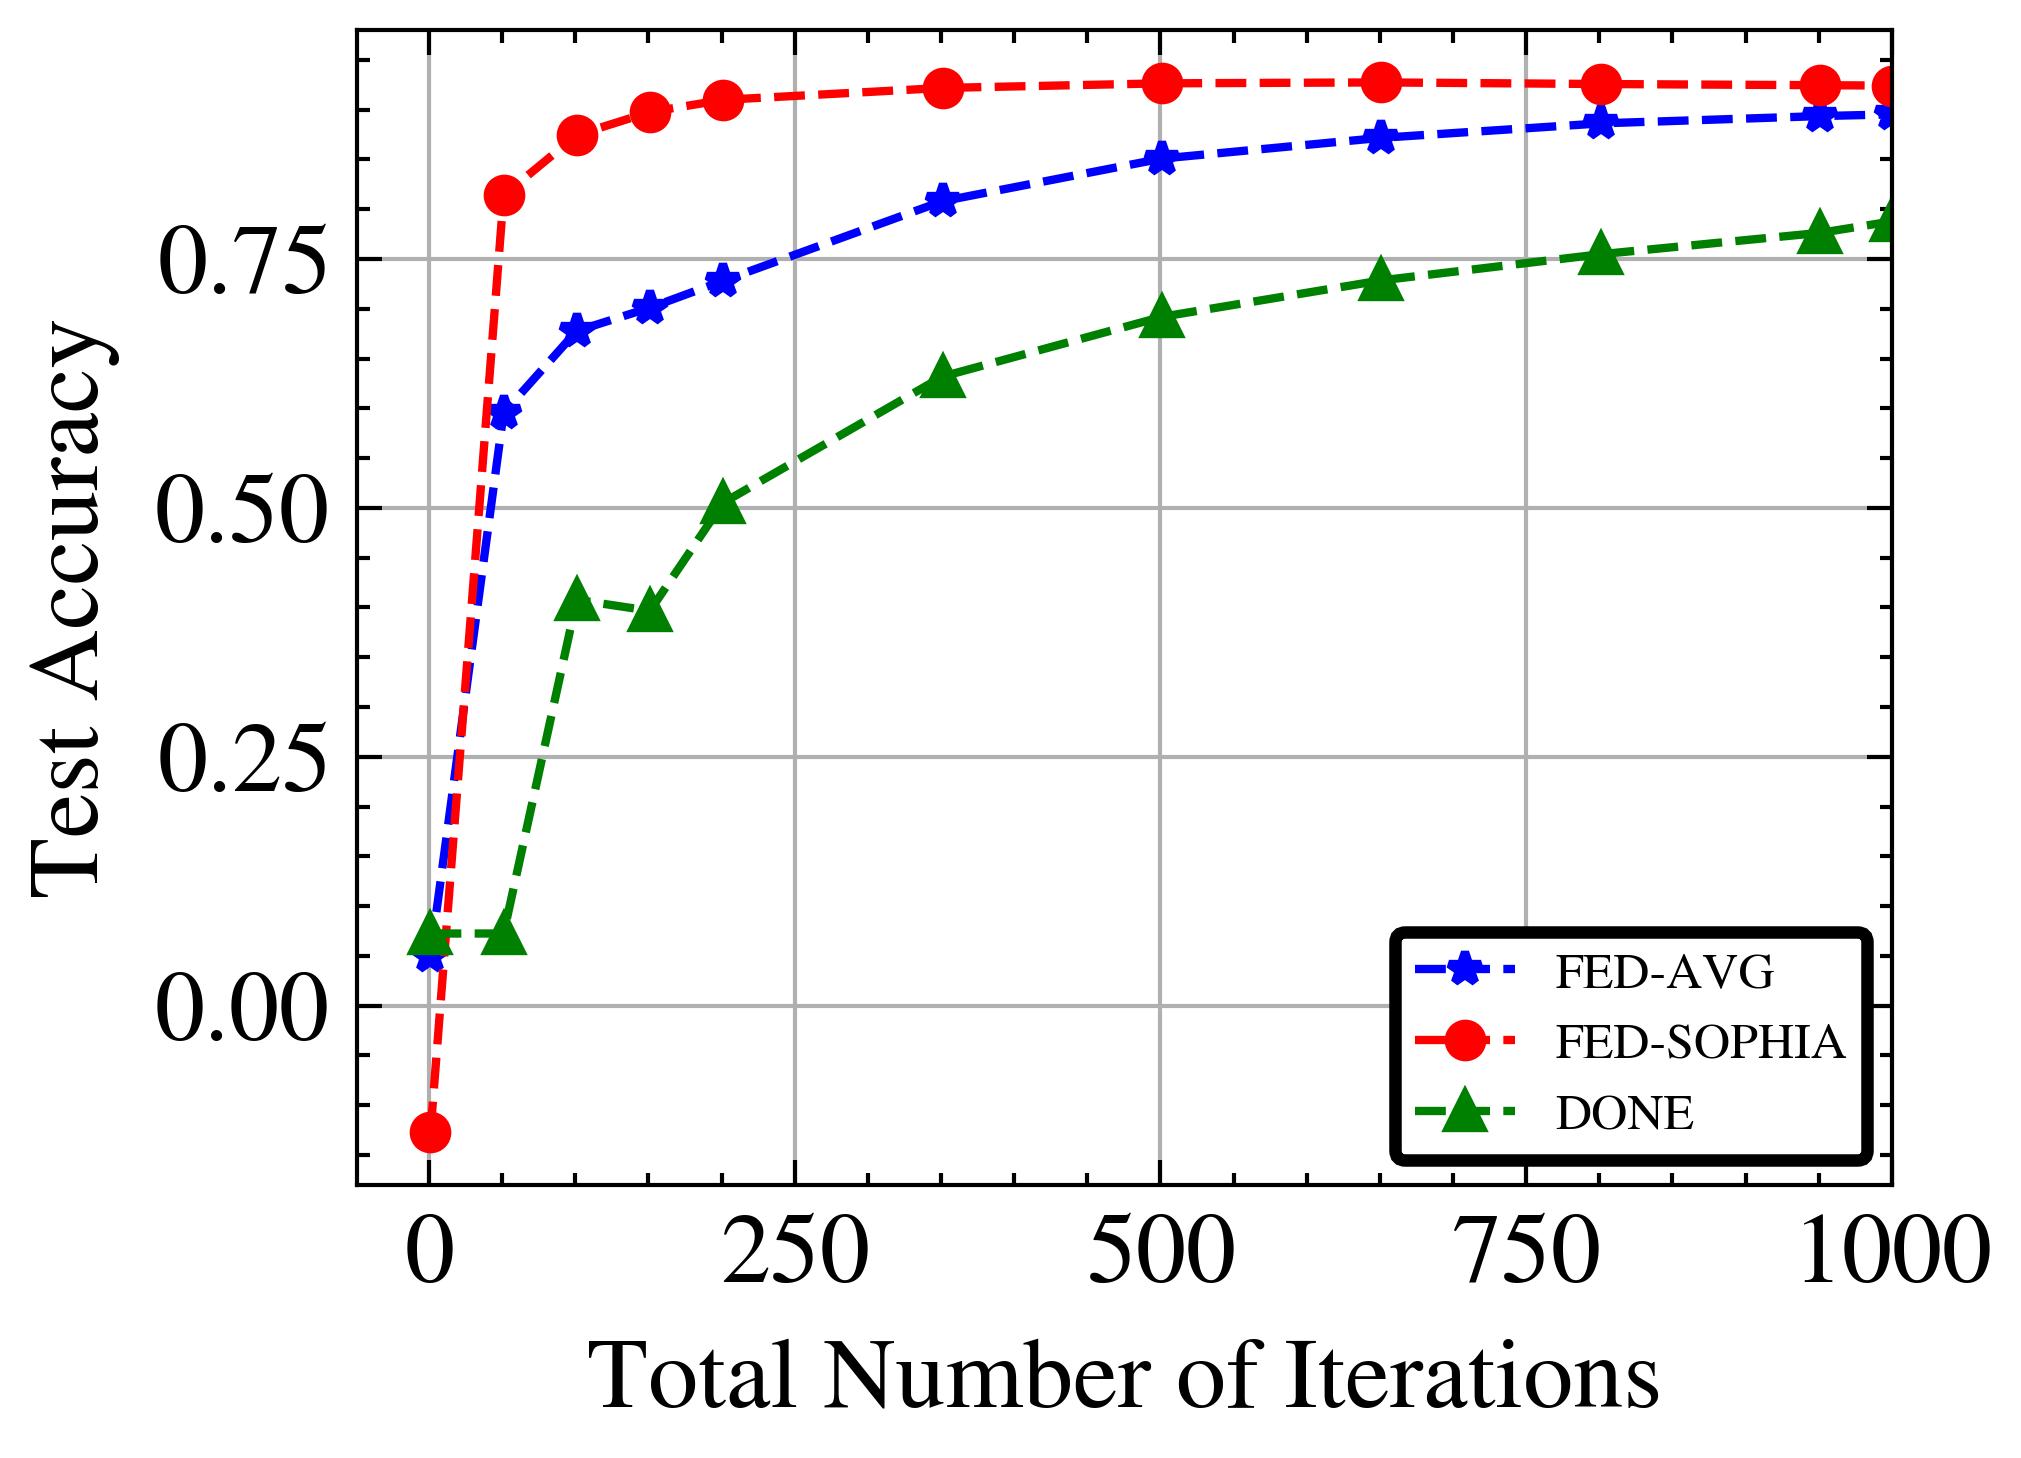

In [10]:
# plot the total number of iteration (number of local epochs * number of communication rounds) vs the accuracy

fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 100*10+1)  # Assuming 100 iterations
avgs = [mlp_mnist_fedavg_acc_mu_ext, mlp_mnist_sophia_acc_mu_ext, mlp_mnist_done_acc_mu_ext[:1000]]
avgs = [savgol_filter(avgs[i], 51, 3) for i in range(3)] # window size 51, polynomial order 3
for i in range(3):
    x_data = np.concatenate([iterations[:20 * 10:50], iterations[20 * 10::150], iterations[-1:]])
    y_data = np.concatenate([avgs[i][:20*10:50], avgs[i][20*10::150], avgs[i][-1:]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)


# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                frameon=True)


# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)


# Set tick label font size
plt.tick_params(labelsize=12)

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Total Number of Iterations', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
# ax.set_title('Test Accuracy', fontsize=12)
#set size for axis name
plt.tick_params(labelsize=12)
# set limit of x axis
plt.xlim(right= 1000)
ax.grid(True)
# save plot
plt.savefig('test_acc_mlp_mnist_total.pdf')
# Display the plot
plt.show()


### Comm_round

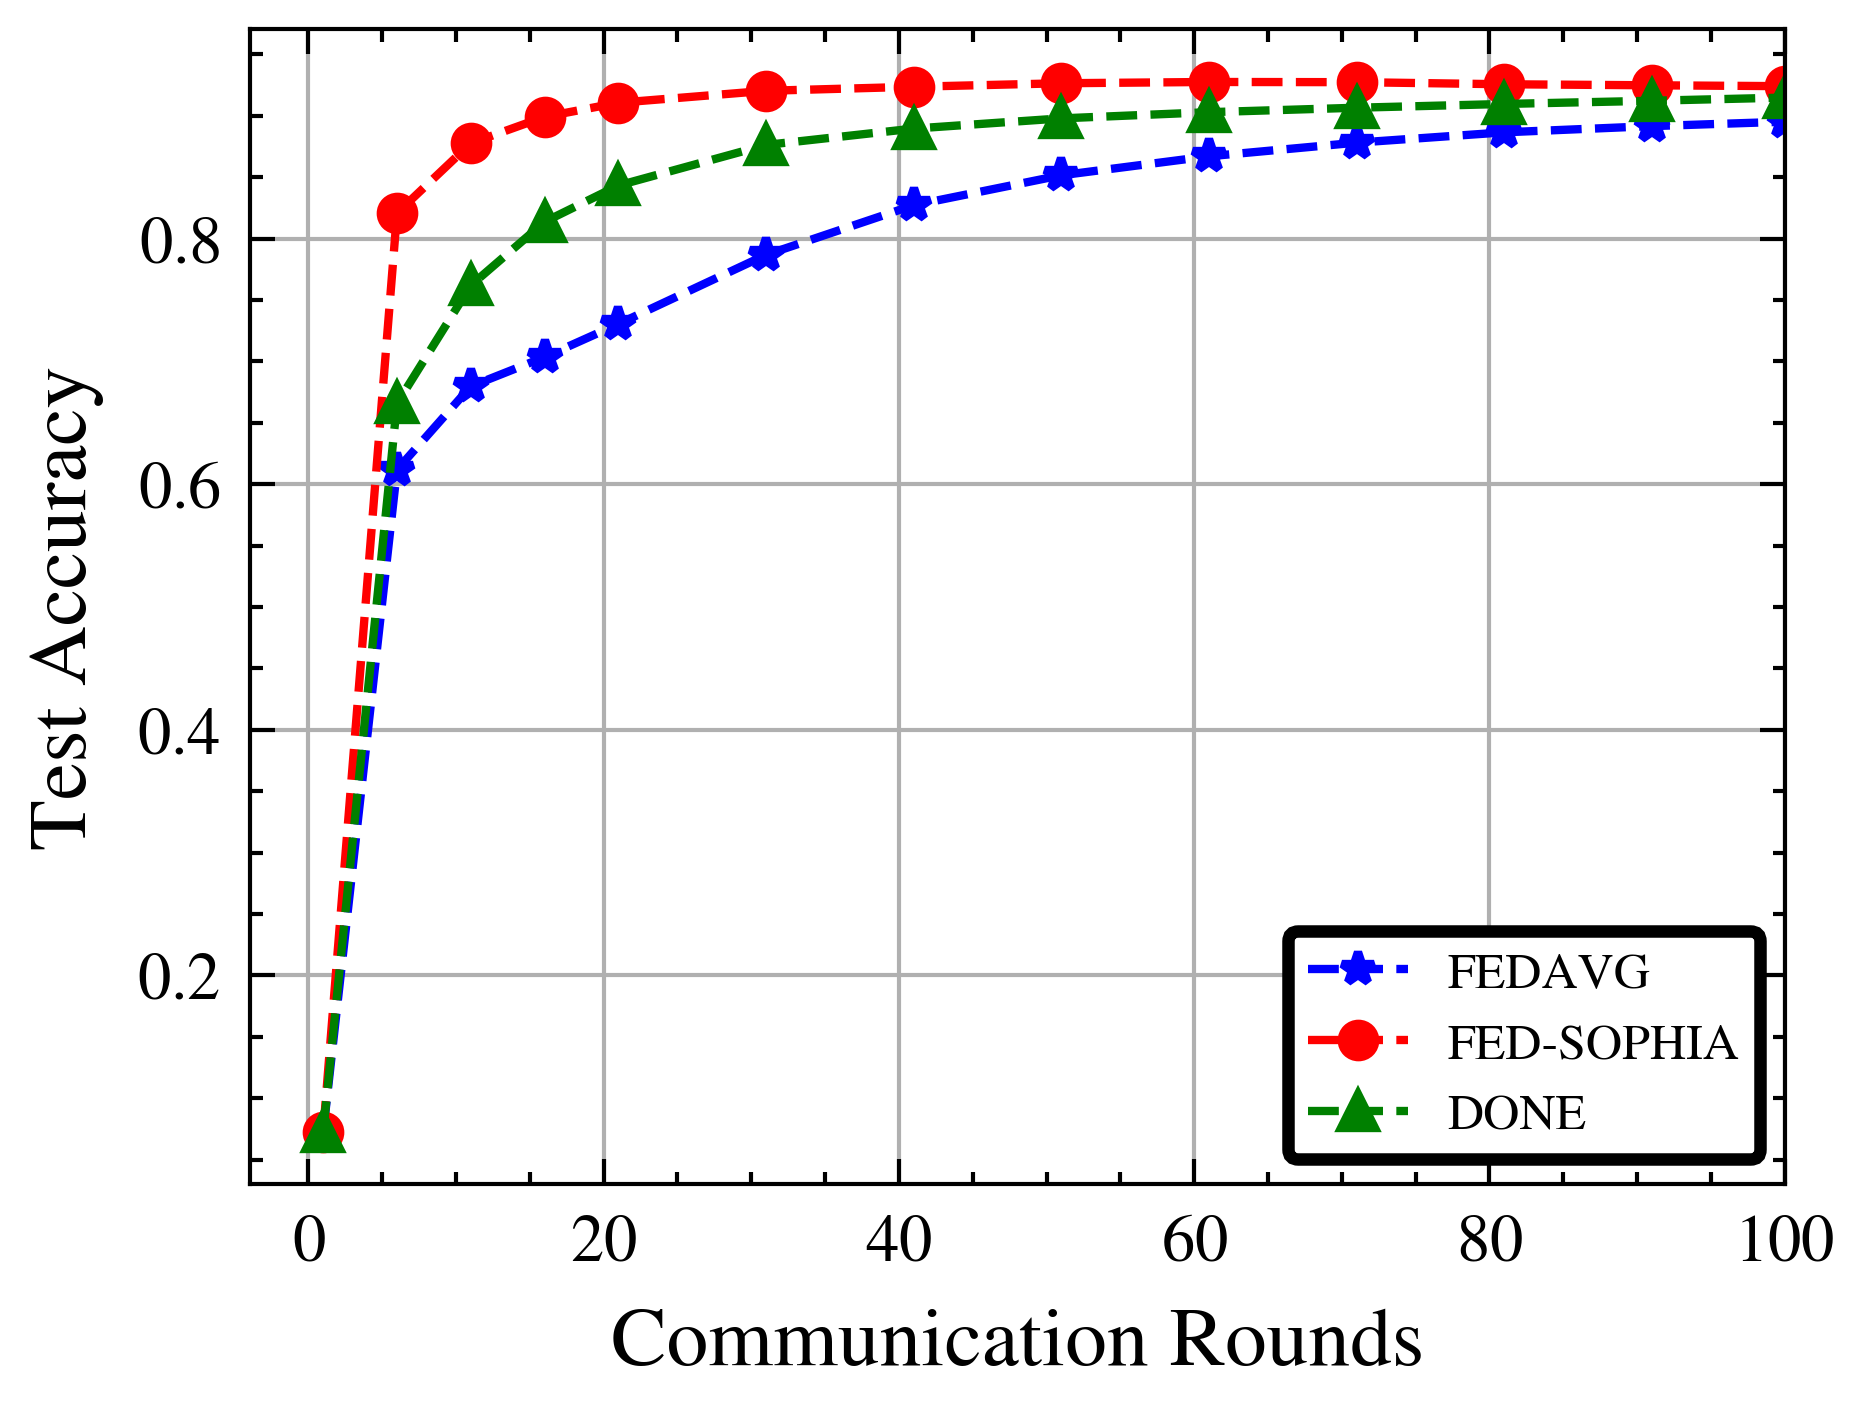

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data (mlp_mnist_fedavg_acc_mu, mlp_mnist_sophia_acc_mu, mlp_mnist_done_acc_mu not provided)
iterations = np.arange(1, 101)

# Create the figure and axes
fig, ax = plt.subplots()

# Define markers, line styles, colors, and labels
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red', 'green']
labels = ['FEDAVG', 'FED-SOPHIA', 'DONE']

avgs = [mlp_mnist_fedavg_acc_mu, mlp_mnist_sophia_acc_mu, mlp_mnist_done_acc_mu]
# Plot the data
for i in range(3):
    x_data = np.concatenate([iterations[:20:5], iterations[20::10], iterations[-1:]])
    y_data = np.concatenate([avgs[i][:20:5], avgs[i][20::10], avgs[i][-1:]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)
# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy', fontsize=10)
ax.grid(True)

# Add a legend in a box within the axis
# ax.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05), frameon=True)

# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                frameon=True)


# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)


# Set tick label font size
# plt.tick_params(labelsize=12)
plt.xlim(right= 100)

# Save the plot
plt.savefig('test_acc_mlp_mnist.pdf')

# Display the plot
plt.show()


## MLP-FMNIST

In [12]:
MLP_FMNIST_Sophia = get_results('mlp', 'fmnist-sophia')
MLP_FMNIST_DONE = get_results('mlp', 'fmnist-done')
MLP_FMNIST_FedAvg = get_results('mlp', 'fmnist-fedavg')

mlp_fmnist_sophia_loss = MLP_FMNIST_Sophia[-1]
mlp_fmnist_sophia_acc = MLP_FMNIST_Sophia[-2]

mlp_fmnist_done_loss = MLP_FMNIST_DONE[-1]
mlp_fmnist_done_acc = MLP_FMNIST_DONE[-2]

mlp_fmnist_fedavg_loss = MLP_FMNIST_FedAvg[-1]
mlp_fmnist_fedavg_acc = MLP_FMNIST_FedAvg[-2]


Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_0.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_2.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_4.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_1.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_0b_10_3.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_3.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_4.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_1.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_0.h5
Fashion_Mnist_DONE_1_0.008_0.1_0.02_32u_0b_8_2.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_2.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_0.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_4.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_1.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_3.h5


In [13]:
mlp_fmnist_sophia_loss_mu, mlp_fmnist_sophia_loss_std = get_mu_std(mlp_fmnist_sophia_loss)
mlp_fmnist_done_loss_mu, mlp_fmnist_done_loss_std = get_mu_std(mlp_fmnist_done_loss)
mlp_fmnist_fedavg_loss_mu, mlp_fmnist_fedavg_loss_std = get_mu_std(mlp_fmnist_fedavg_loss)

# mu/std for acc
mlp_fmnist_sophia_acc_mu, mlp_fmnist_sophia_acc_std = get_mu_std(mlp_fmnist_sophia_acc)
mlp_fmnist_done_acc_mu, mlp_fmnist_done_acc_std = get_mu_std(mlp_fmnist_done_acc)
mlp_fmnist_fedavg_acc_mu, mlp_fmnist_fedavg_acc_std = get_mu_std(mlp_fmnist_fedavg_acc)


In [14]:
# extend mlp_mnist_fedavg_acc_mu to be 1000 elements not 100
# every elment is repeated 10 times

mlp_fmnist_fedavg_acc_mu_ext, mlp_fmnist_sophia_acc_mu_ext, mlp_fmnist_done_acc_mu_ext = [], [], []
for i in range(100):
    for j in range(10):
        mlp_fmnist_fedavg_acc_mu_ext.append(mlp_fmnist_fedavg_acc_mu[i])
        mlp_fmnist_sophia_acc_mu_ext.append(mlp_fmnist_sophia_acc_mu[i])

In [15]:
for i in range(100):
    for j in range(80):
        mlp_fmnist_done_acc_mu_ext.append(mlp_fmnist_done_acc_mu[i])

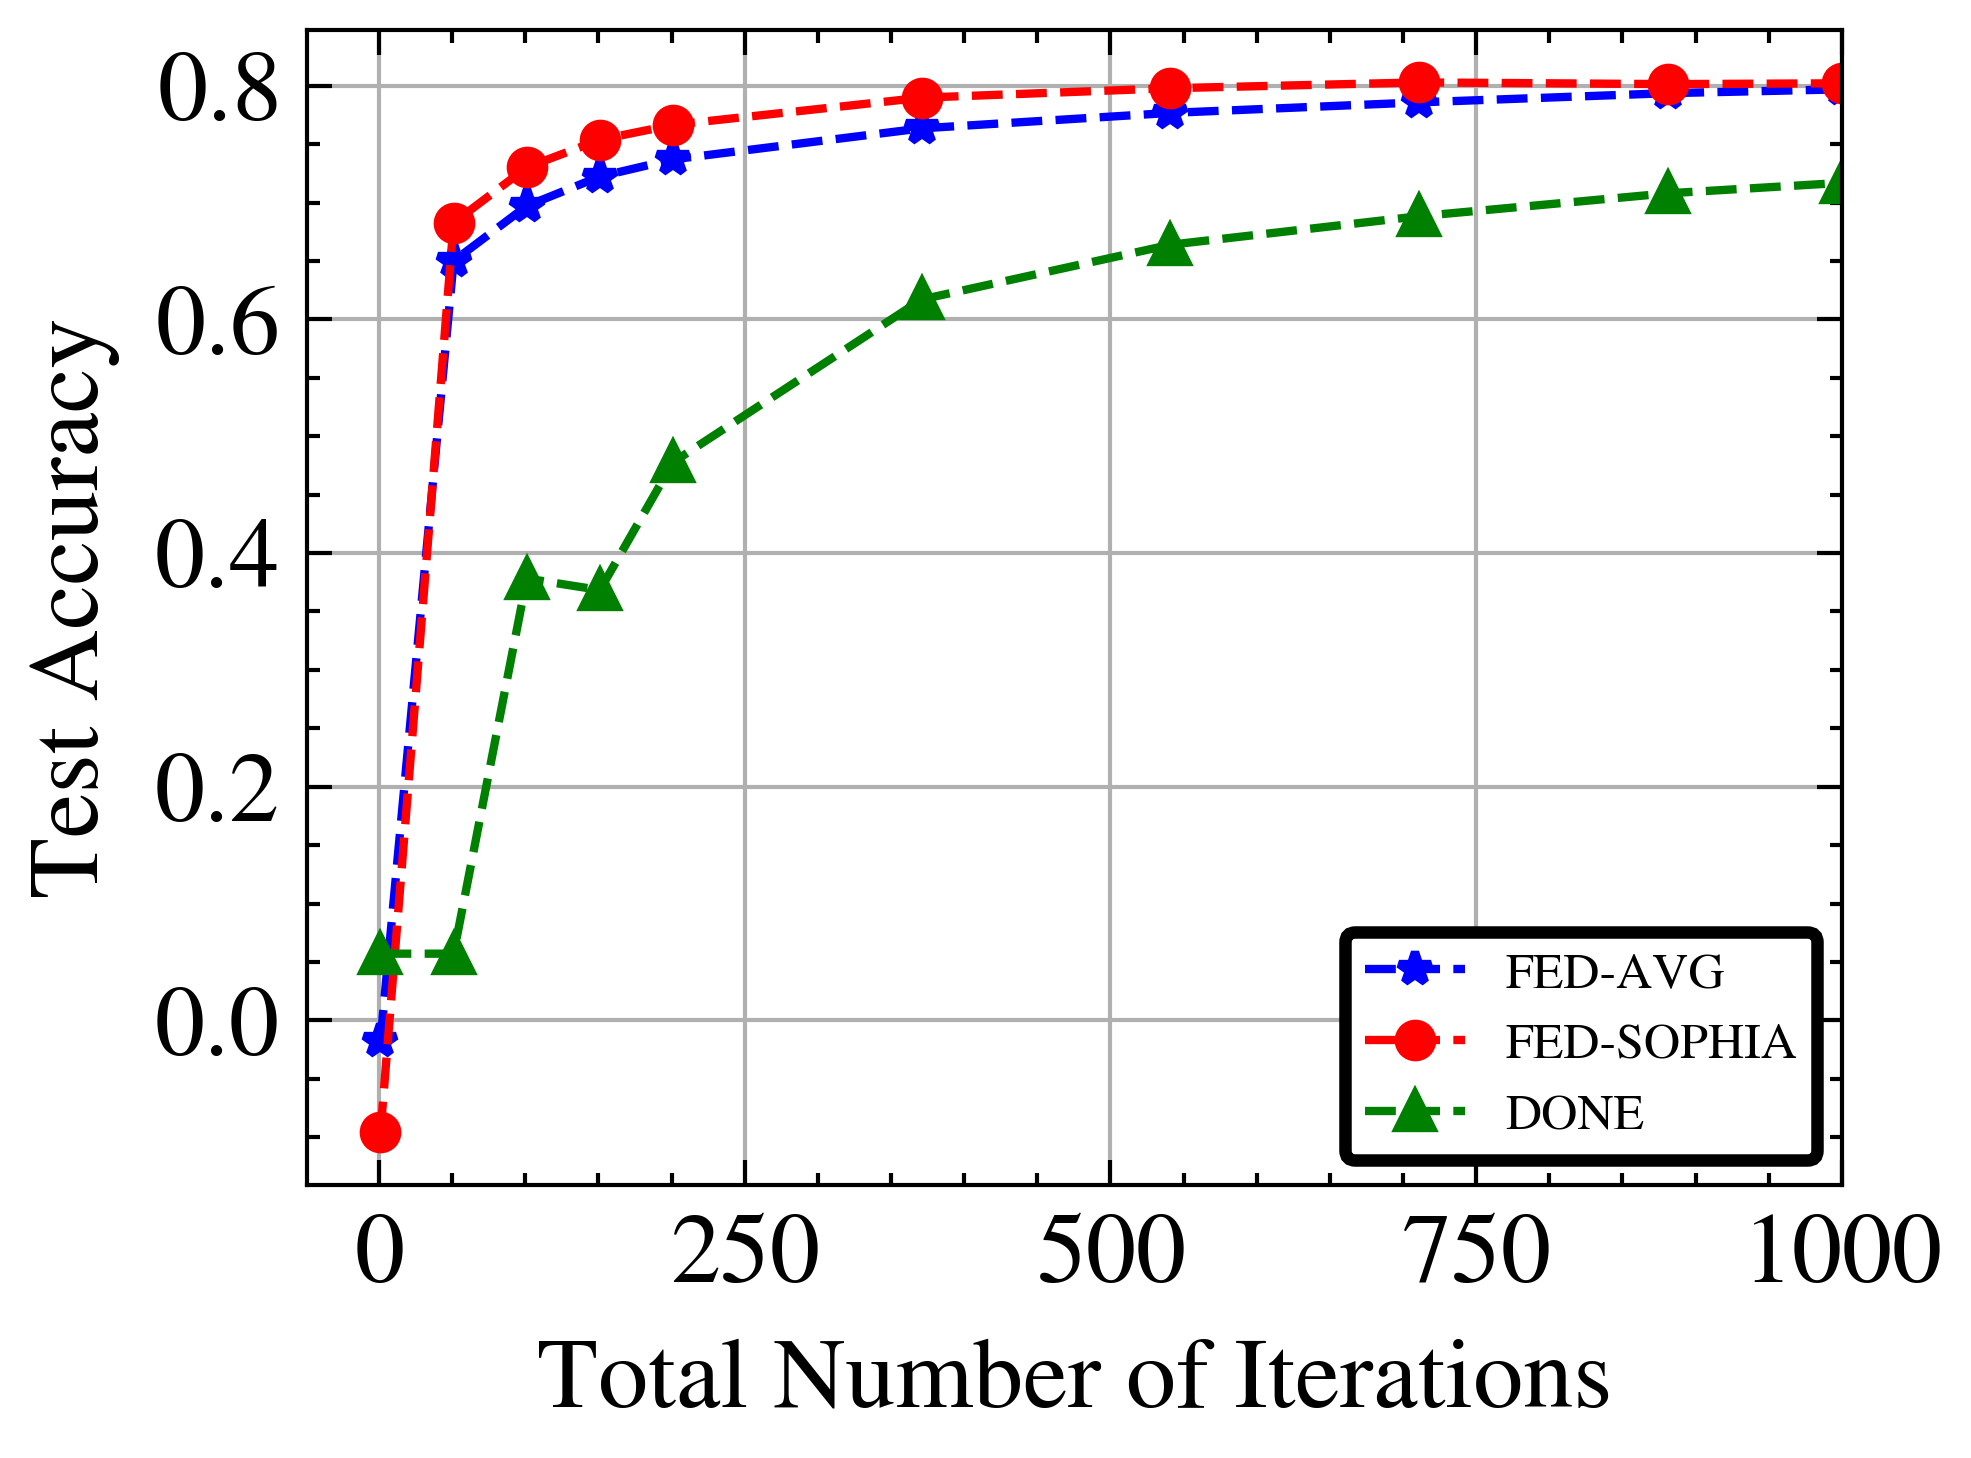

In [16]:
# plot the total number of iteration (number of local epochs * number of communication rounds) vs the accuracy

fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 100*10+1)  # Assuming 100 iterations
avgs = [mlp_fmnist_fedavg_acc_mu_ext, mlp_fmnist_sophia_acc_mu_ext, mlp_fmnist_done_acc_mu_ext[:1000]]
avgs = [savgol_filter(avgs[i], 51, 3) for i in range(3)] # window size 51, polynomial order 3
for i in range(3):
    x_data = np.concatenate([iterations[:20 * 10:50], iterations[20 * 10::170], iterations[-1:]])
    y_data = np.concatenate([avgs[i][:20*10:50], avgs[i][20*10::170], avgs[i][-1:]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)


# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                frameon=True)


# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)


# Set tick label font size
plt.tick_params(labelsize=12)

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Total Number of Iterations', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
# ax.set_title('Test Accuracy', fontsize=12)
#set size for axis name
plt.tick_params(labelsize=12)
# set limit of x axis
plt.xlim(right= 1000)
ax.grid(True)
# save plot
plt.savefig('test_acc_mlp_fmnist_total.pdf')
# Display the plot
plt.show()


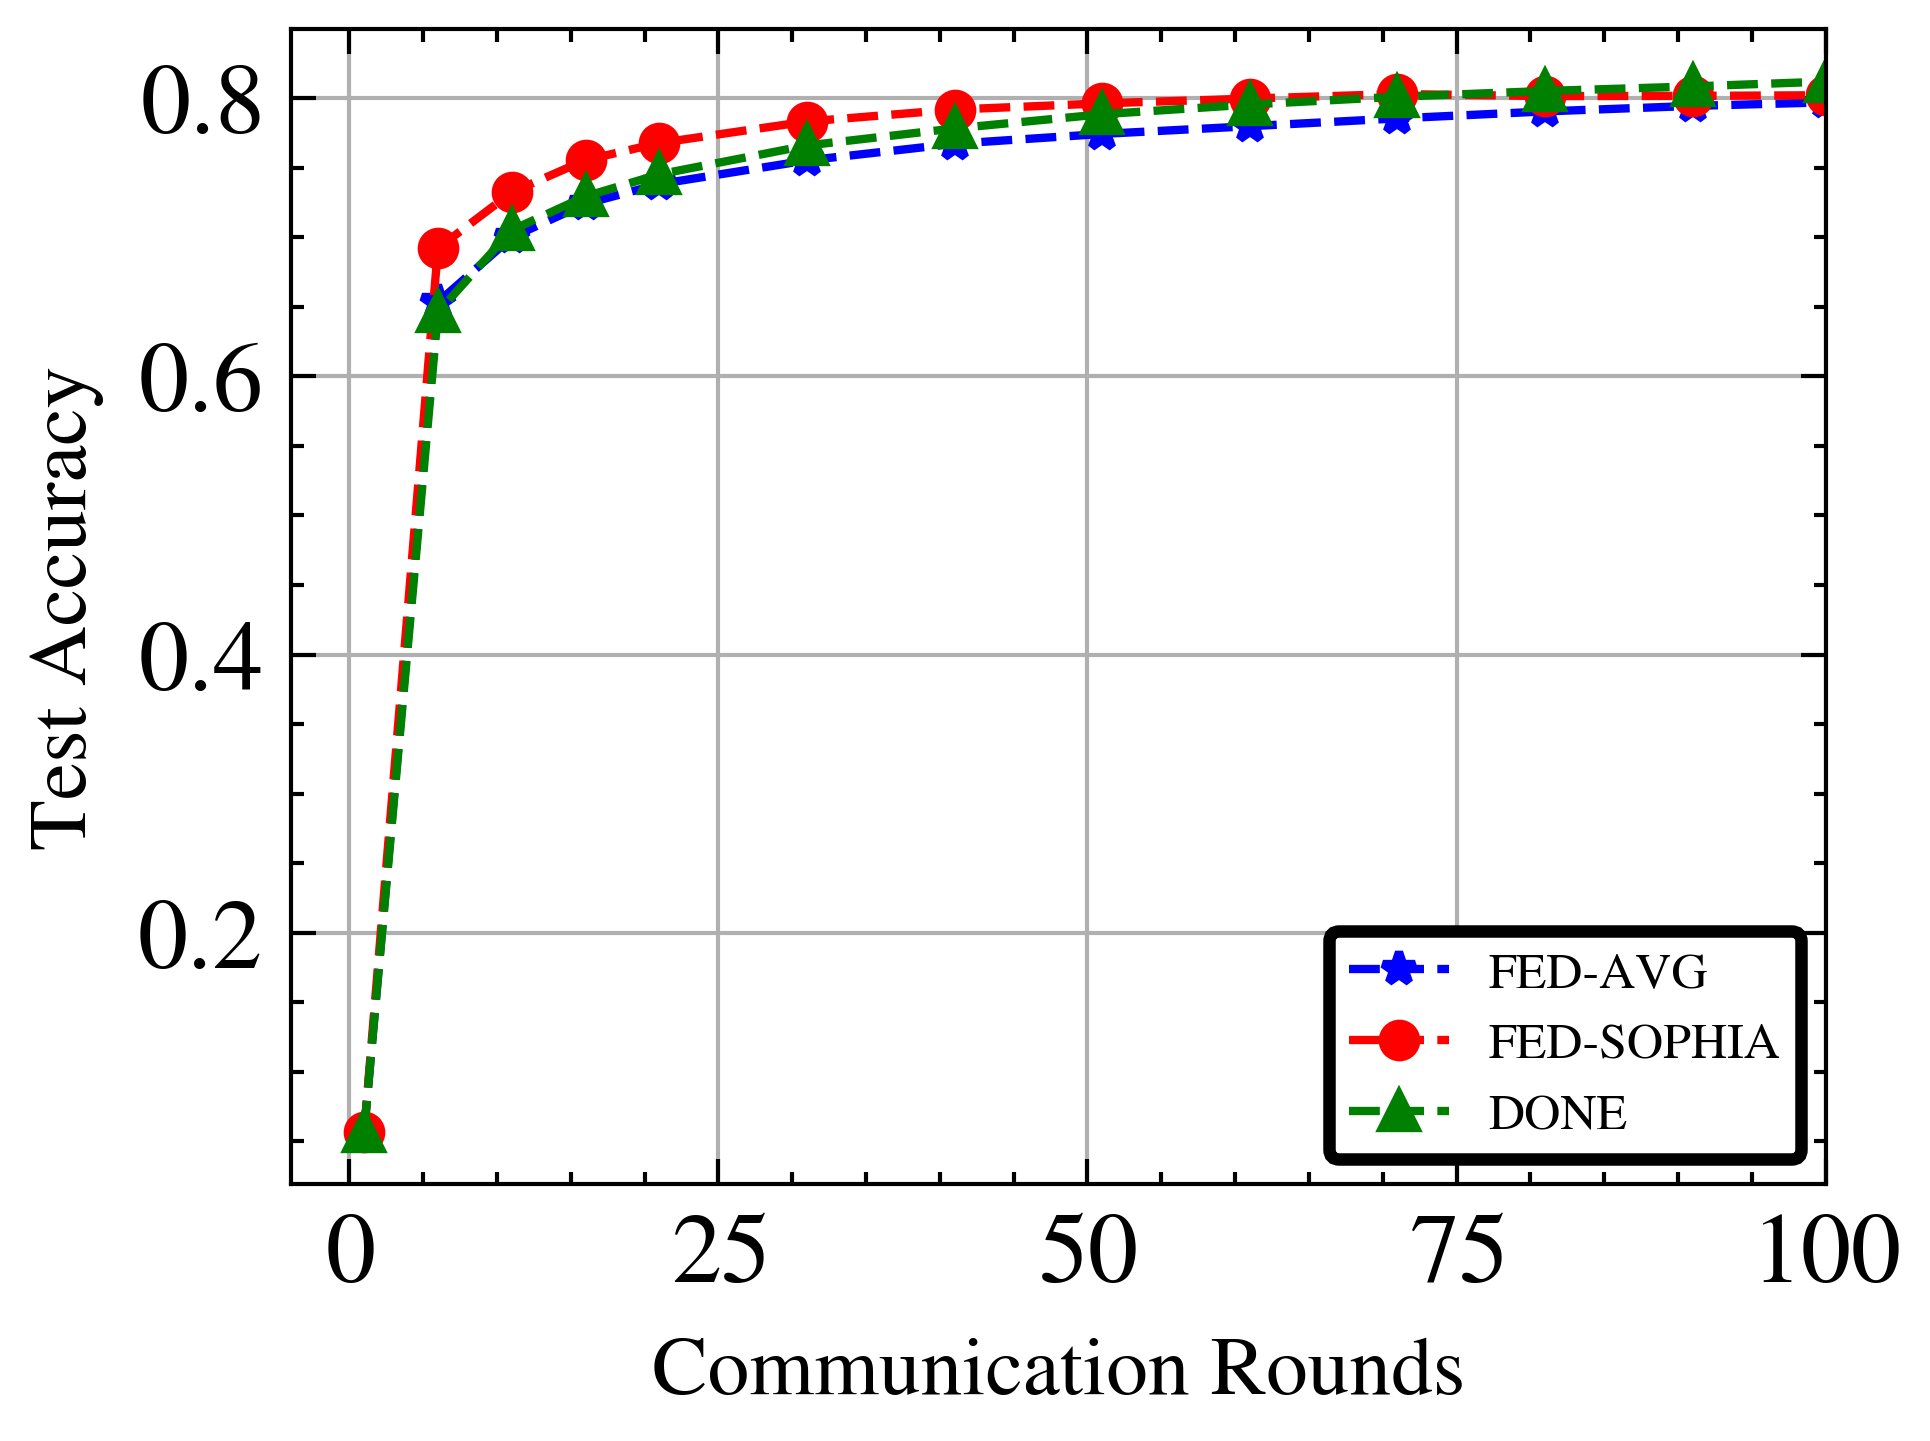

In [17]:
# plot acc
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_fmnist_fedavg_acc_mu, mlp_fmnist_sophia_acc_mu, mlp_fmnist_done_acc_mu]

for i in range(3):
    x_data = np.concatenate([iterations[:20 :5], iterations[20::10], iterations[-1:]])
    y_data = np.concatenate([avgs[i][:20:5], avgs[i][20::10], avgs[i][-1:]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)

    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
#set size for legend

# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                frameon=True)
# ax.legend(prop={'size': 12})

# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
plt.xlim(right= 100)

# save plot
# Display the plot
# save plot
plt.savefig('test_acc_mlp_fmnist.pdf')
# Display the plot
plt.show()


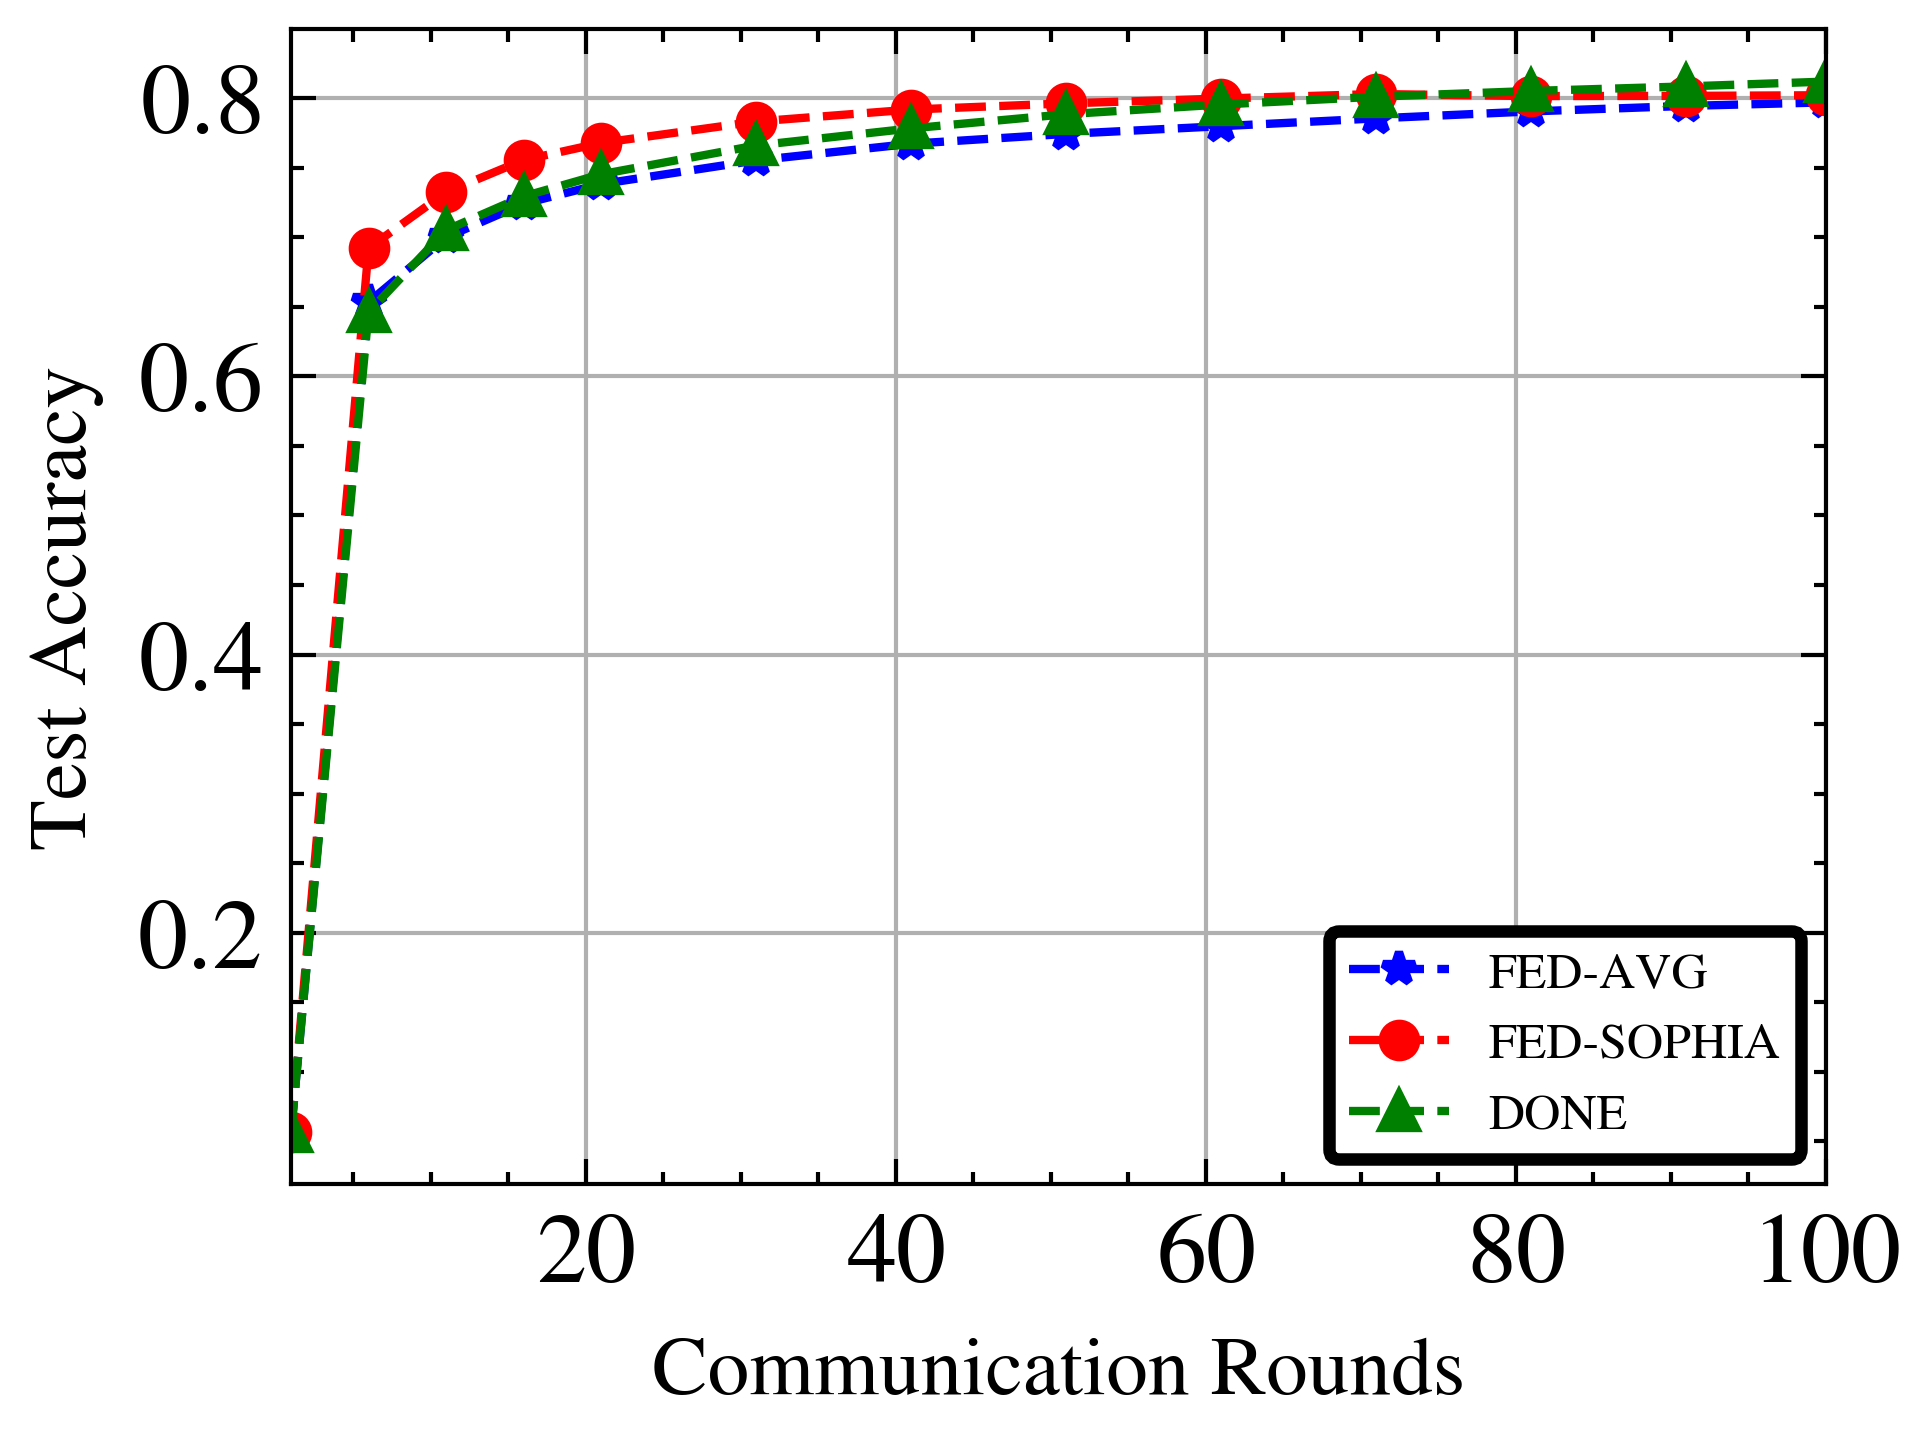

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red', 'green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_fmnist_fedavg_acc_mu, mlp_fmnist_sophia_acc_mu, mlp_fmnist_done_acc_mu]

for i in range(3):
    x_data = np.concatenate([iterations[:20:5], iterations[20::10], iterations[-1:]])
    y_data = np.concatenate([avgs[i][:20:5], avgs[i][20::10], avgs[i][-1:]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy', fontsize=10)
ax.grid(True)

# Set the limits of the x and y axes to zoom in
plt.xlim(1, 100)  # Adjust these values to zoom in as desired

# Create a zoomed-in subplot inside the main subplot
# axins = ax.inset_axes([0.50, 0.30, 0.35, 0.35])

# axins.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], markersize=4)

# # Set the limits for the zoomed-in subplot
# axins.set_xlim(40, 100)  # Adjust these values to zoom in as desired
# axins.set_ylim(0.4, 1.0)  # Adjust these values to zoom in as desired

# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5), frameon=True)

# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)

# Set the size for axis labels
plt.tick_params(labelsize=12)

# Save the plot
plt.savefig('test_acc_mlp_fmnist.pdf')

# Display the plot
plt.show()


## CNN-MNIST


In [19]:
CNN_MNIST_Sophia = get_results('cnn', 'mnist-sophia')
CNN_MNIST_DONE = get_results('cnn', 'mnist-done')
CNN_MNIST_FedAvg = get_results('cnn', 'mnist-fedavg')

cnn_mnist_sophia_loss = CNN_MNIST_Sophia[-1]
cnn_mnist_sophia_acc = CNN_MNIST_Sophia[-2]

cnn_mnist_done_loss = CNN_MNIST_DONE[-1]
cnn_mnist_done_acc = CNN_MNIST_DONE[-2]

cnn_mnist_fedavg_loss = CNN_MNIST_FedAvg[-1]
cnn_mnist_fedavg_acc = CNN_MNIST_FedAvg[-2]


Mnist_Sophia_0.003_0.03_1.0_0.001_32u_512b_10_0(1).h5
Mnist_DONE_1_0.0005_0.05_0.02_32u_0b_120_0.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_4.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_2.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_3.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_1.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_0.h5


In [20]:
cnn_mnist_sophia_loss_mu, cnn_mnist_sophia_loss_std = get_mu_std(cnn_mnist_sophia_loss)
cnn_mnist_done_loss_mu, cnn_mnist_done_loss_std = get_mu_std(cnn_mnist_done_loss)
cnn_mnist_fedavg_loss_mu, cnn_mnist_fedavg_loss_std = get_mu_std(cnn_mnist_fedavg_loss)

# mu/std for acc
cnn_mnist_sophia_acc_mu, cnn_mnist_sophia_acc_std = get_mu_std(cnn_mnist_sophia_acc)
cnn_mnist_done_acc_mu, cnn_mnist_done_acc_std = get_mu_std(cnn_mnist_done_acc)
cnn_mnist_fedavg_acc_mu, cnn_mnist_fedavg_acc_std = get_mu_std(cnn_mnist_fedavg_acc)


In [21]:
# extend mlp_mnist_fedavg_acc_mu to be 1000 elements not 100
# every elment is repeated 10 times

cnn_mnist_fedavg_acc_mu_ext, cnn_mnist_sophia_acc_mu_ext, cnn_mnist_done_acc_mu_ext = [], [], []
for i in range(100):
    for j in range(10):
        cnn_mnist_fedavg_acc_mu_ext.append(cnn_mnist_fedavg_acc_mu[i])
        cnn_mnist_sophia_acc_mu_ext.append(cnn_mnist_sophia_acc_mu[i])

In [22]:
for i in range(100):
    for j in range(80):
        cnn_mnist_done_acc_mu_ext.append(mlp_mnist_done_acc_mu[i])

In [23]:
iterations[-1:]

array([100])

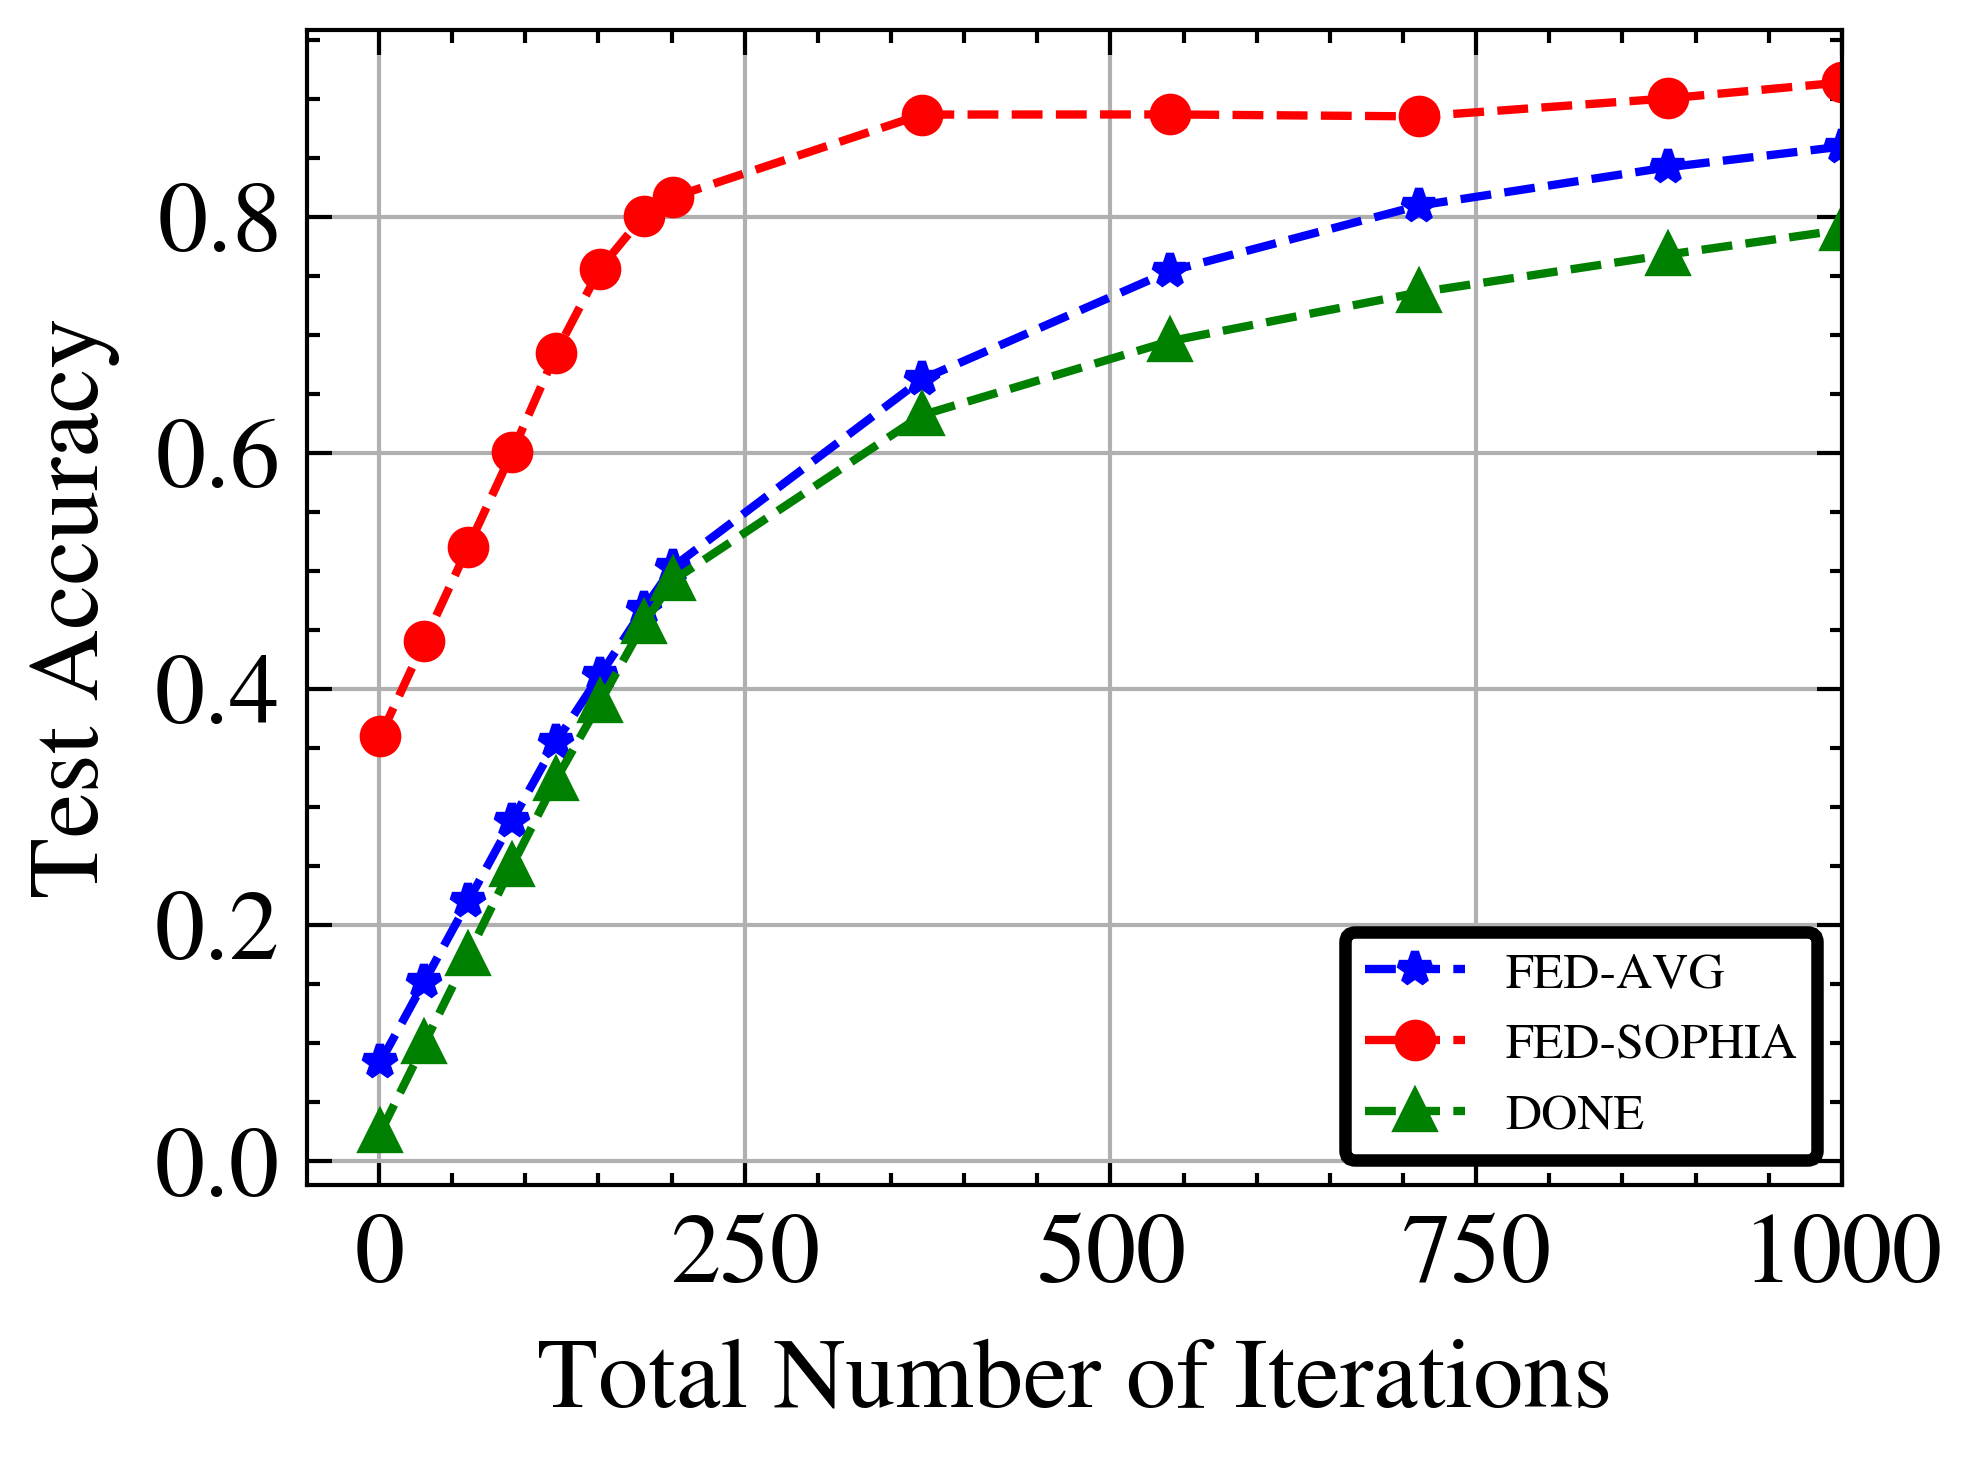

In [24]:
# plot the total number of iteration (number of local epochs * number of communication rounds) vs the accuracy

fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 100*10+1)  # Assuming 100 iterations
avgs = [cnn_mnist_fedavg_acc_mu_ext, cnn_mnist_sophia_acc_mu_ext, cnn_mnist_done_acc_mu_ext[:1000]]

avgs = [savgol_filter(avgs[i], 230, 1) for i in range(3)] # window size 51, polynomial order 3

for i in range(3):
    x_data = np.concatenate([iterations[:20 * 10:30], iterations[20 * 10::170], iterations[-1:]])
    y_data = np.concatenate([avgs[i][:20*10:30], avgs[i][20*10::170], avgs[i][-1:]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)


# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                    frameon=True)


# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)


# Set tick label font size
plt.tick_params(labelsize=12)

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Total Number of Iterations', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
# ax.set_title('Test Accuracy', fontsize=12)
#set size for axis name
plt.tick_params(labelsize=12)
# set limit of x axis
plt.xlim(right= 1000)
ax.grid(True)

# save plot
plt.savefig('test_acc_cnn_mnist_total.pdf')
# Display the plot
plt.show()


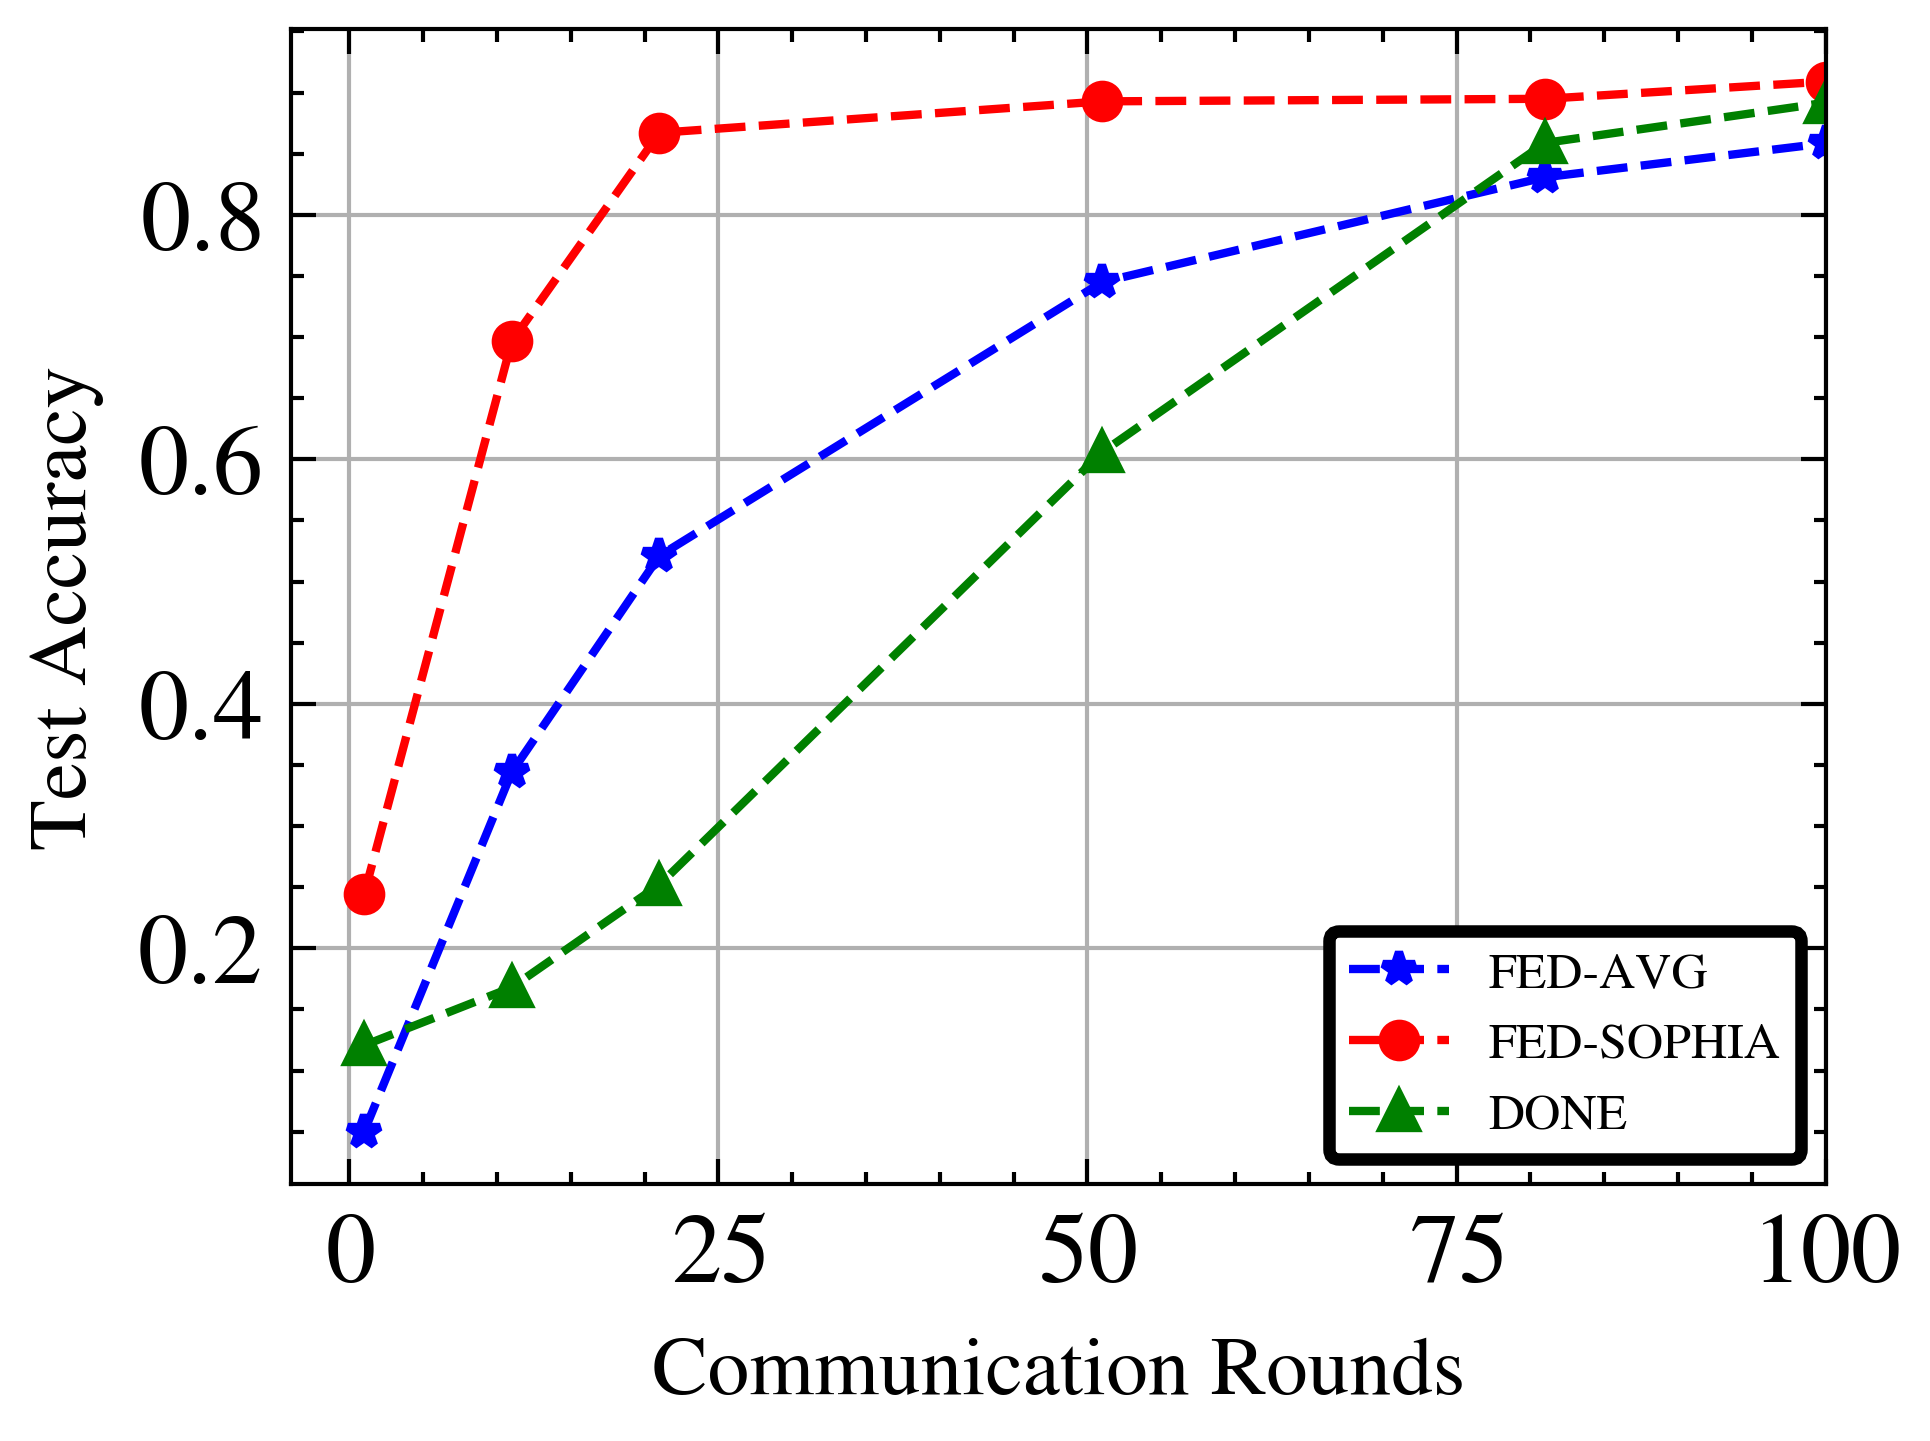

In [25]:
# plot accuracy
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_fedavg_acc_mu, cnn_mnist_sophia_acc_mu, cnn_mnist_done_acc_mu]
avgs = [savgol_filter(avgs[i], 50, 3) for i in range(len(avgs))] # window size 51, polynomial order 3

for i in range(3):
    x_data = np.concatenate([iterations[:20:10], iterations[20::30], iterations[-1:]])
    y_data = np.concatenate([avgs[i][:20:10], avgs[i][20::30], avgs[i][-1:]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)

    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
#set size for legend
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                frameon=True)
# ax.legend(prop={'size': 12})
plt.xlim(right= 100)  # Adjust these values to zoom in as desired

# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)
# ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_mnist.pdf')
# Display the plot
plt.show()


## CNN-FMNIST

In [26]:
CNN_FMNIST_Sophia = get_results('cnn', 'fmnist-sophia')
# CNN_FMNIST_DONE = get_results('cnn', 'fmnist-done')
CNN_FMNIST_FedAvg = get_results('cnn', 'fmnist-fedavg')

cnn_fmnist_sophia_loss = CNN_FMNIST_Sophia[-1]
cnn_fmnist_sophia_acc = CNN_FMNIST_Sophia[-2]

# cnn_fmnist_done_loss = CNN_FMNIST_DONE[-1]
# cnn_fmnist_done_acc = CNN_FMNIST_DONE[-2]

cnn_fmnist_fedavg_loss = CNN_FMNIST_FedAvg[-1]
cnn_fmnist_fedavg_acc = CNN_FMNIST_FedAvg[-2]


Fashion_Mnist_Sophia_0.003_0.03_1.0_0.001_32u_512b_10_0.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.001_32u_512b_10_4.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.001_32u_512b_10_1.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.001_32u_512b_10_2.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.001_32u_512b_10_3.h5
Fashion_Mnist_FedAvg_0.01_0.03_0.01_0.001_32u_512b_10_0.h5


In [27]:
cnm_fmnist_sophia_loss_mu, cnn_fmnist_sophia_loss_std = get_mu_std(cnn_fmnist_sophia_loss)
# cnn_fmnist_done_loss_mu, cnn_fmnist_done_loss_std = get_mu_std(cnn_fmnist_done_loss)
cnn_fmnist_fedavg_loss_mu, cnn_fmnist_fedavg_loss_std = get_mu_std(cnn_fmnist_fedavg_loss)

# mu/std for acc
cnn_fmnist_sophia_acc_mu, cnn_fmnist_sophia_acc_std = get_mu_std(cnn_fmnist_sophia_acc)
# cnn_fmnist_done_acc_mu, cnn_fmnist_done_acc_std = get_mu_std(cnn_fmnist_done_acc)
cnn_fmnist_fedavg_acc_mu, cnn_fmnist_fedavg_acc_std = get_mu_std(cnn_fmnist_fedavg_acc)


In [28]:
cnn_fmnist_fedavg_acc_mu_ext, cnn_fmnist_sophia_acc_mu_ext, cnn_fmnist_done_acc_mu_ext = [], [], []
for i in range(100):
    for j in range(10):
        cnn_fmnist_fedavg_acc_mu_ext.append(cnn_fmnist_fedavg_acc_mu[i])
        cnn_fmnist_sophia_acc_mu_ext.append(cnn_fmnist_sophia_acc_mu[i])

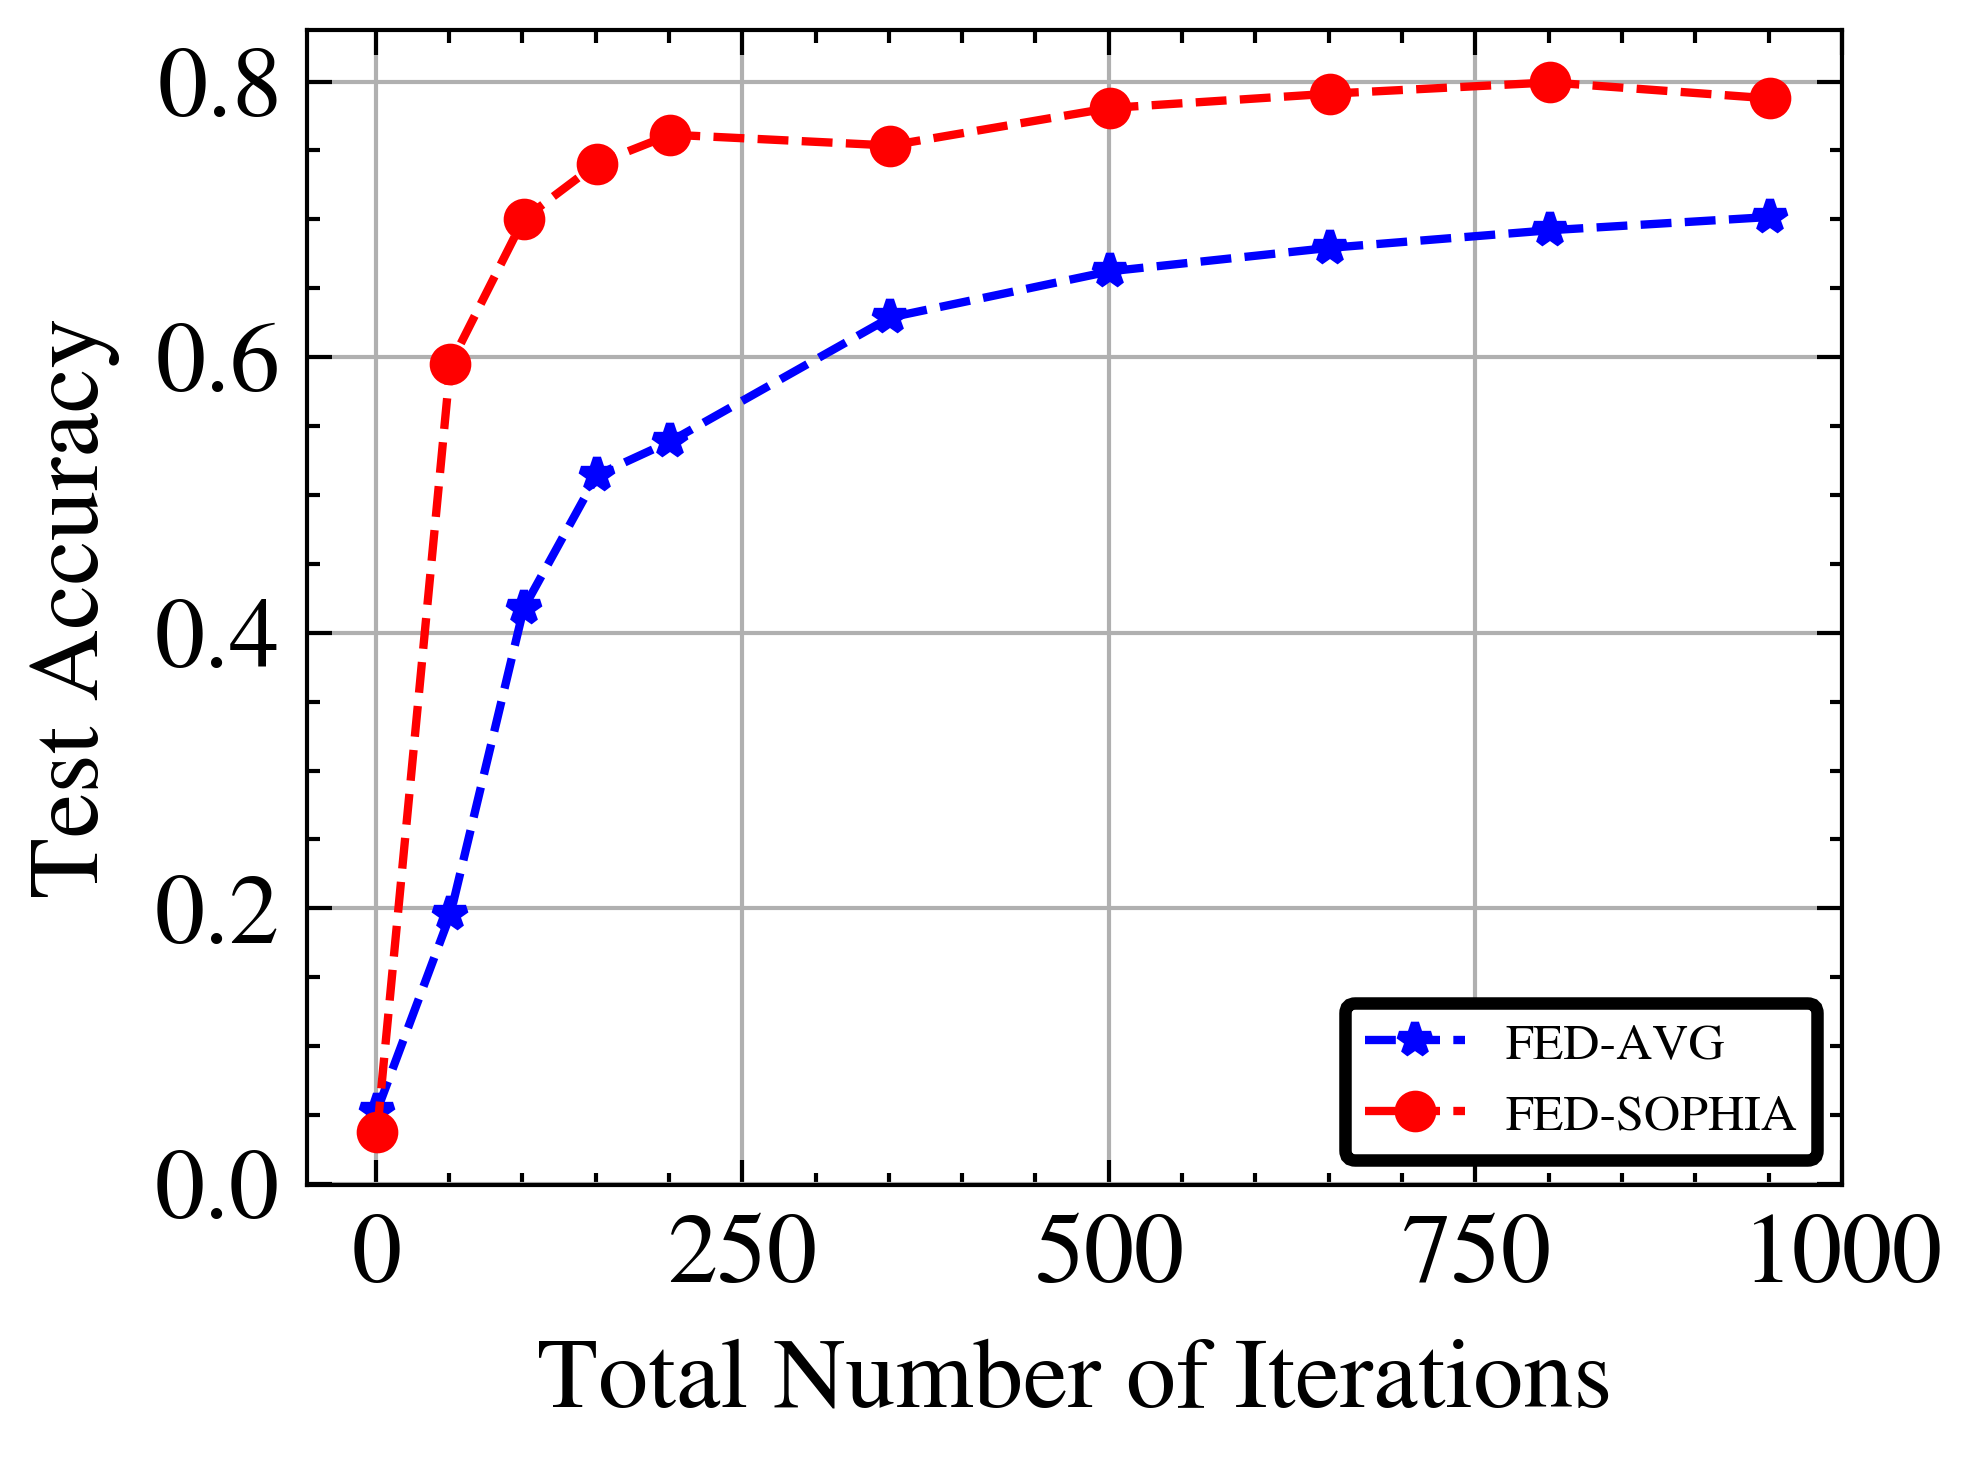

In [29]:
# plot the total number of iteration (number of local epochs * number of communication rounds) vs the accuracy

fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 100*10+1)  # Assuming 100 iterations

avgs = [cnn_fmnist_fedavg_acc_mu_ext, cnn_fmnist_sophia_acc_mu_ext]#, cnn_fmnist_done_acc_mu_ext[:1000]]
avgs = [savgol_filter(avgs[i], 51, 3) for i in range(2)] # window size 51, polynomial order 3
for i in range(2):
    x_data = np.concatenate([iterations[:20 * 10:50], iterations[20 * 10::150]])
    y_data = np.concatenate([avgs[i][:20*10:50], avgs[i][20*10::150]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)


# Control the size of the box using borderaxespad and borderpad
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                frameon=True)


# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)


# Set tick label font size
plt.tick_params(labelsize=12)

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Total Number of Iterations', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
# ax.set_title('Test Accuracy', fontsize=12)
#set size for axis name
plt.tick_params(labelsize=12)
# set limit of x axis
plt.xlim(right= 1000)
ax.grid(True)

# save plot
plt.savefig('test_acc_cnn_fmnist_total.pdf')
# Display the plot
plt.show()


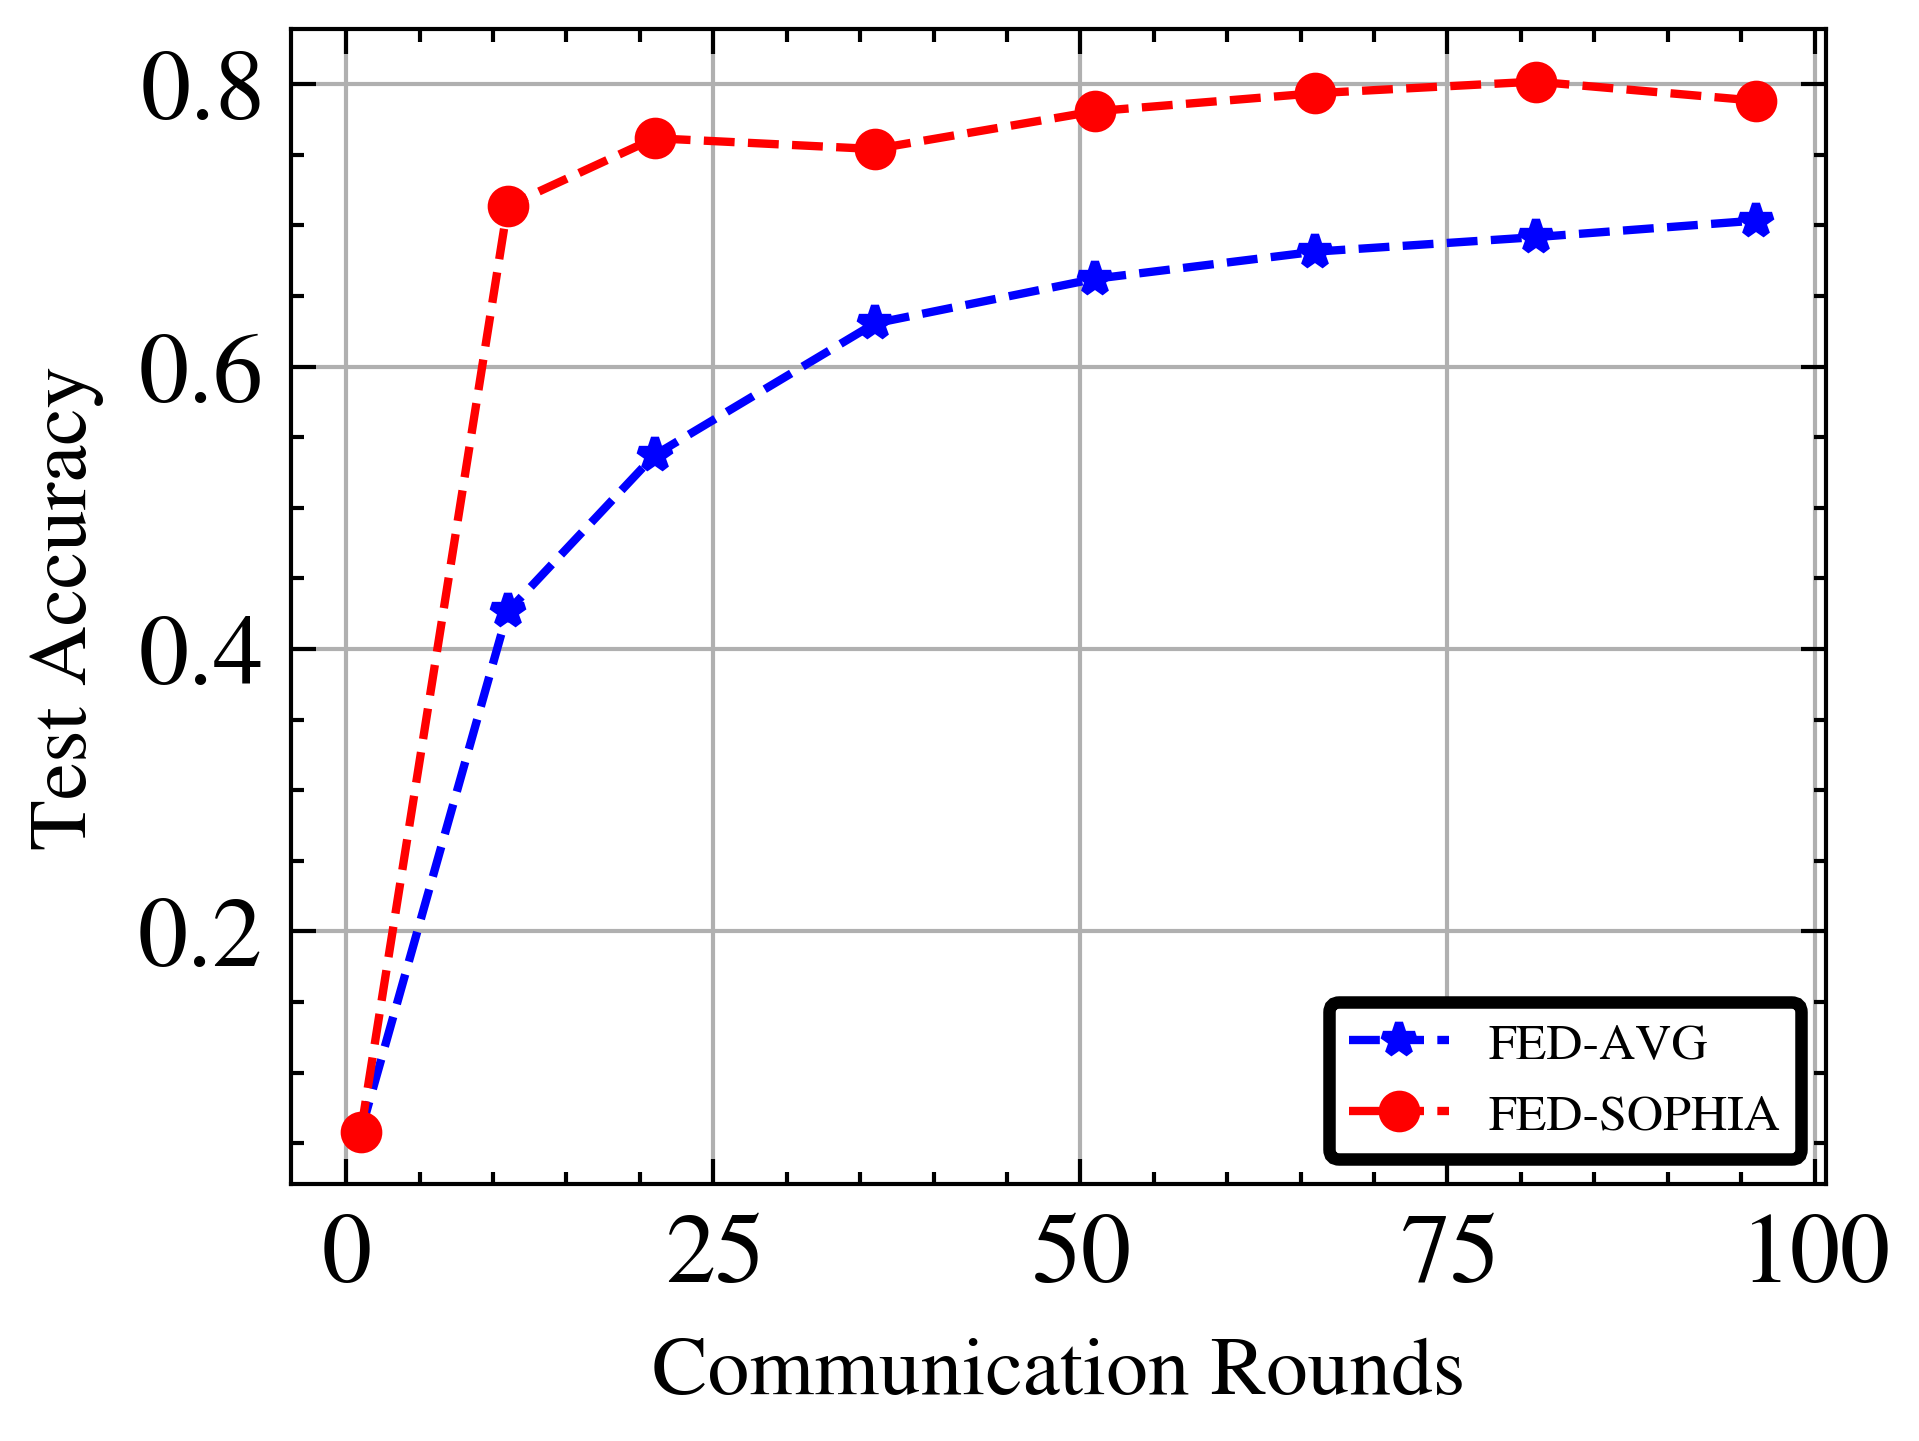

In [30]:
# plot accuracy
fig, ax = plt.subplots()
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_fmnist_fedavg_acc_mu, cnn_fmnist_sophia_acc_mu]#, cnn_fmnist_done_acc_mu]

for i in range(2):
    x_data = np.concatenate([iterations[:20:10], iterations[20::15]])
    y_data = np.concatenate([avgs[i][:20:10], avgs[i][20::15]])

    ax.plot(x_data, y_data, marker=markers[i], linestyle=line_styles[i], color=colors[i], label=labels[i], markersize=4)

    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communication Rounds', fontsize=10)
ax.set_ylabel('Test Accuracy',  fontsize=10)
#set size for legend
legend = plt.legend(loc='lower right', \
                    bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
                frameon=True)
# ax.legend(prop={'size': 12})

# Adjust the padding using borderaxespad
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)
# ax.legend(prop={'size': 12})
#set size for axis names
plt.tick_params(labelsize=12)
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_fmnist.pdf')
# Display the plot
plt.show()


## Carboon Footprint

In [31]:
#read emission.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('emission.csv')
# print(df.columns)
df = df[['project_name','duration(s)','power_consumption(kWh)','CO2_emissions(kg)']]

In [32]:
df

,project_name,duration(s),power_consumption(kWh),CO2_emissions(kg)
0,Mnist_FedAvg_CNN_512b_0.01lr_0.03al_0.01eta_0....,632.915825,0.013843,0.005409
1,Mnist_DONE_CNN_0b_1lr_0.0005al_0.05eta_0.02L_0...,6887.545325,0.296842,0.115991
2,Mnist_Sophia_CNN_512b_0.0005lr_0.03al_1.0eta_0...,708.197130,0.016650,0.006506


In [33]:
#free-space path loss channel mode equation
def free_space_path_loss(distance):
    b = 2
    n_0 = 10e-9
    power = 100
    return b * np.log2( 1 + power / (b * n_0 * distance))